<div class="alert alert-block alert-info">
Работа заключается в анализе продаж игр интернет-магазина "Стримчик"

1. Изучить исторические данные о продажах игр:
Выявить тренды и закономерности в продажах игр в период с 2016 года и ранее.
Проанализировать влияние жанра, платформы, оценок пользователей и экспертов на продажи.
Определить, какие факторы наиболее сильно влияют на успешность игры.

2. Построить модель прогнозирования продаж:
Разработать модель, которая сможет предсказывать продажи игр в 2017 году.
Оценить точность модели и ее способность предсказывать успех игр.

3. Определить потенциально популярные игры в 2017 году:
Используя модель прогнозирования, выявить игры, которые имеют наибольший потенциал для успеха в 2017 году.
Определить игры, на которые стоит сделать ставку при планировании рекламных кампаний.

4. Разработать рекомендации по планированию рекламных кампаний:
Предложить оптимальные стратегии рекламных кампаний для потенциально успешных игр, учитывая особенности их жанра, платформы и целевой аудитории.
Определить наиболее эффективные каналы продвижения для выбранных игр.
</div>

# Изучение информации 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


# Небольшой вывод
<div class="alert alert-block alert-info">
   
Датасет содержит 16715 записей, 11 столбцов. Во всех столбцах присутствуют пропуски. Почему-то год выпуска записан в формате вещественных чисел, а оценка игроков-в формате object. Исправим это, и переведем год в int64, а user_score в float64.
В столбцах записаны названия игр, игровые платформы, год выпуска, категории игр, продажи в Северной Америке, Европе, Японии и в других регионах, рейтинг критиков, рейтинг от пользователей, и возрастные ограничения для игр.

# Предобработка данных

In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
#games = games.rename(columns={'Name': 'name', 'Platform':'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'Other_sales': 'other_sales', 'Critic_Scrore': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'})
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-block alert-info">
Перевели названия столбцов в змеиный регистр

In [6]:
games.duplicated().sum()

0

<div class="alert alert-block alert-info">
Явных дубликатов нет

In [7]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [9]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [10]:
games['year_of_release'].isna().sum()

269

<div class="alert alert-block alert-info">
В столбце с годом выпуска присутствуют пропуски, но это не мешает нам перевести его в формат int64

In [11]:
games['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [12]:
duplicates = games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)
print(f"Количество неявных дубликатов: {duplicates.sum()}")
if duplicates.sum() > 0:
    print("Неявные дубликаты:")
    print(games[duplicates])

Количество неявных дубликатов: 4
Неявные дубликаты:
                name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
659              NaN      GEN           1993.0     NaN      1.78      0.53   
14244            NaN      GEN           1993.0     NaN      0.00      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score user_score rating  
604        0.00         0.23          83.0        5.5      E  
659        0.00         0.08           NaN        NaN    NaN  
14244      0.03         0.00           NaN        NaN    NaN  
16230      0.00         0.00          83.0        5.5      E  


In [13]:
games.loc[604, 'eu_sales'] = 2.57
games.loc[604, 'eu_sales']

2.57

In [14]:
games.drop([16230, 659, 14244], inplace=True)

In [96]:
games[duplicates]

/tmp/ipykernel_109/3911860410.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  games[duplicates]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,2.57,0.0,0.23,83.0,5.5,E,4.91


In [16]:
madden_row = games[games['name'] == 'Madden NFL 13']
print(madden_row)

               name platform  year_of_release   genre  na_sales  eu_sales  \
507   Madden NFL 13     X360           2012.0  Sports      2.53      0.15   
604   Madden NFL 13      PS3           2012.0  Sports      2.11      2.57   
3986  Madden NFL 13      Wii           2012.0  Sports      0.47      0.00   
5887  Madden NFL 13      PSV           2012.0  Sports      0.28      0.00   
7066  Madden NFL 13     WiiU           2012.0  Sports      0.21      0.00   

      jp_sales  other_sales  critic_score user_score rating  
507        0.0         0.17          81.0        5.8      E  
604        0.0         0.23          83.0        5.5      E  
3986       0.0         0.03           NaN        7.3      E  
5887       0.0         0.02          63.0        7.3      E  
7066       0.0         0.02          75.0        6.7      E  


In [17]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16712, dtype: Int64

<div class="alert alert-block alert-info">
Перевели годы в целочисленный формат

In [18]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [19]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')
games['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16712, dtype: float64

<div class="alert alert-block alert-info">
Перевели оценки пользователей в вещественный формат. Отметим, что в этой колонке также присутствуют пропуски.
    
'tbd' означает, что оценки требуют уточнения, то есть было получено недостаточно отзывов от игроков, чтобы посчитать среднюю оценку.
    
Заменим эти значения на NaN, так как ничего не изменится, 'tbd' означает отсутствие оценки.

In [20]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<div class="alert alert-block alert-info">
В будущем удалим строки без жанра и названия, поскольку они бесполезны для анализа.

In [21]:
games['name'].value_counts()

Need for Speed: Most Wanted           12
LEGO Marvel Super Heroes               9
FIFA 14                                9
Madden NFL 07                          9
Ratatouille                            9
                                      ..
Digimon World: Dawn / Dusk             1
The Haunted: Hell's Reach              1
MotoGP 3 - Official Game of MotoGP     1
Boku no Natsuyasumi                    1
Jet Force Gemini                       1
Name: name, Length: 11559, dtype: int64

In [22]:
games[games['name'] == 'FIFA 14']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
1753,FIFA 14,XOne,2013,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E
4699,FIFA 14,PSV,2013,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E
4809,FIFA 14,PC,2013,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E
4985,FIFA 14,Wii,2013,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E
6871,FIFA 14,3DS,2013,Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN
7875,FIFA 14,PSP,2013,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E


<div class="alert alert-block alert-info">
Видим дубликаты среди названий игр, это связано с тем, что игры выходили на разные платформы. Это нормально, особенно в относительно давнее время, когда не существовало кроссплатформы, то есть когда игроки с PC и, например, XBOX не могли играть вместе.

In [23]:
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<div class="alert alert-block alert-info">
Видим, что пропуски в столбце 'genre' и 'name' приходятся на одинаковые строки, поскольку нет данных о названии игры, то и невозможно определить ее жанр.

In [24]:
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-info">
Несмотря на то, что здесь присутствуют достаточно популярные игры, рейтинг по ним почему-то отсутствует. Это может быть связано с тем, что сервисы не предоставили данные по оценкам пользователей.

In [25]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-info">
Достаточно много пропусков, хотя речь идет о популярных играх, мы видим рейтинг 8.5 у первой игры с пропущенным годом выпуска. Это связано с тем, что производители, видимо, не передали данные об играх нашему сервису.

In [26]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16181,Sakura Sakura: Haru Urara,PSP,2010,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16182,Rocksmith 2014 Edition Remastered,XOne,2016,Misc,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00


<div class="alert alert-block alert-info">
Добавлен новый столбец с суммой продаж по регионам, видим, что игра с наибольшими продажами-это Wii Sports.
    
\\\ Странно, я ожидал GTA V


In [27]:
games[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [29]:
games['critic_score'].isna().sum()

8576

In [30]:
games['user_score'].isna().sum()

9123

In [31]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,0.01
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [32]:
games.drop(games[games['year_of_release'].isna()].index,inplace=True)
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16443, dtype: Int64

Вывод
<div class="alert alert-block alert-info">
В нашем наборе данных присутствуют пропуски, которые необходимо обработать. Давайте разделим их на три категории:

1. Возможно восстановить:

year_of_release: в названиях игр может быть указан год выпуска. Однако, для спортивных игр, таких как FIFA, год в названии может указывать на год окончания сезона. Например, FIFA 2004 относится к сезону 2003/2004, а значит игра была выпущена в 2003 году.  

2. Нетребующие восстановления:

Строки 659 и 14244: эти строки содержат пропуски, которые невозможно восстановить и не представляют ценности для анализа. Их лучше удалить из датасета.

3. Невозможно восстановить:

critic_score и user_score: эти столбцы содержат субъективные оценки критиков и пользователей. Невозможно выявить закономерности, которые позволят восстановить пропуски. Оценки сильно зависят от года выпуска, жанра, платформы, разработчика, издателя, рекламы, репутации серии игр и многих других факторов.
    
Явных дубликатов не обнаружено, неявных тоже. В столбце с названиями игр есть одинаковые названия, это связано с тем, что игры выходили на разных платформах.


# Исследовательский анализ данных

In [33]:
games['year_of_release'].value_counts(ascending=True)

1980       9
1984      14
1985      14
1988      15
1987      16
1990      16
1989      17
1983      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      60
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     544
2014     581
2015     606
2012     652
2004     762
2003     775
2002     829
2005     939
2006    1006
2011    1136
2007    1197
2010    1255
2009    1426
2008    1427
Name: year_of_release, dtype: Int64

In [34]:
def plot_histogram_value_counts(df, column_name, title=None, xlabel=None, ylabel="Количество"):

  value_counts = df[column_name].value_counts()

  plt.figure(figsize=(8, 6))
  plt.bar(value_counts.index, value_counts.values)

  
  if title:
    plt.title(title)
  if xlabel:
    plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  plt.xticks(rotation=45, ha='right')
  plt.tight_layout() 

  plt.show()

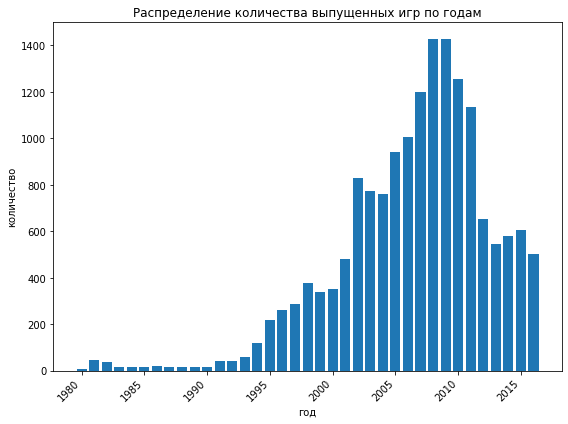

In [35]:
plot_histogram_value_counts(games, 'year_of_release', title='Распределение количества выпущенных игр по годам', xlabel='год', ylabel='количество')

<div class="alert alert-block alert-info">
В начале 2000-х годов наблюдался стремительный рост количества выпускаемых игр, достигнув пика в 2008-2009 годах. Однако, с развитием мобильных устройств и интеграцией социальных сетей в повседневную жизнь, интерес к традиционным играм начал снижаться, что привело к спаду в их производстве.

In [36]:
games['platform'].value_counts(ascending=False)

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

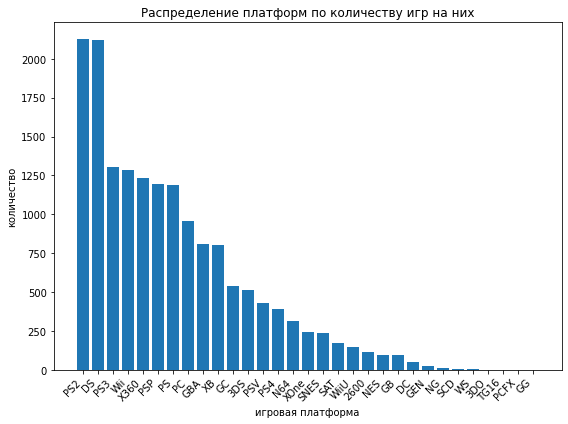

In [37]:
plot_histogram_value_counts(games, 'platform', title='Распределение платформ по количеству игр на них', xlabel='игровая платформа', ylabel='количество')

<div class="alert alert-block alert-info">
Популярность игровых платформ возглавляет PS2, которая является классикой, знакомой многим с детства. За ней следуют Xbox360, PS3 и Wii. Менее распространены японские платформы, которые не столь известны широкой аудитории.
    

In [38]:
platform_sales = pd.pivot_table(games, index=['platform'], values='total_sales', aggfunc='sum')
platform_sales = platform_sales.sort_values('total_sales',ascending=False)
platform_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,933.68
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [39]:
best_sales_platform = list(platform_sales.index[:6])
best_sales_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [40]:
games.loc[15957, 'year_of_release'] = 2007

Платформа  PS2
                          total_sales
platform year_of_release             
PS2      2000                   39.17
         2001                  166.43
         2002                  205.38
         2003                  184.31
         2004                  211.81
         2005                  160.66
         2006                  103.42
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45


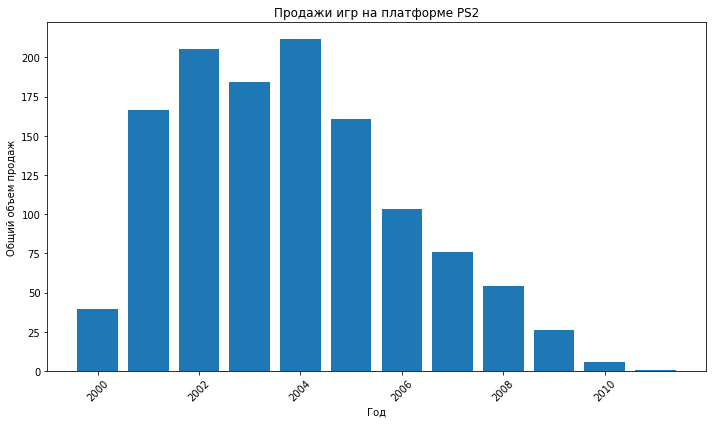

Платформа  X360
                          total_sales
platform year_of_release             
X360     2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84
         2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52


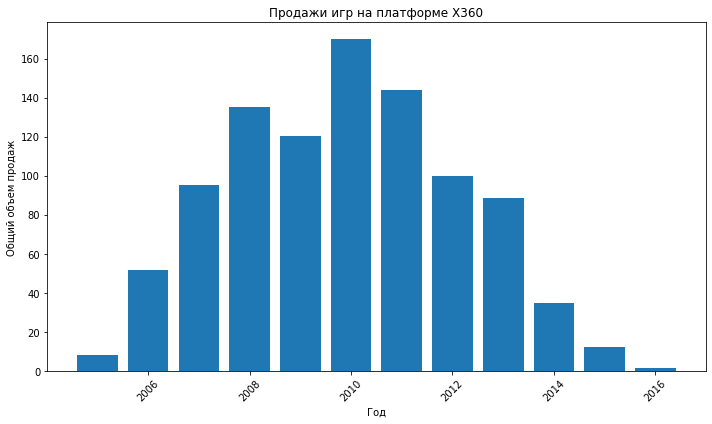

Платформа  PS3
                          total_sales
platform year_of_release             
PS3      2006                   20.96
         2007                   73.19
         2008                  118.52
         2009                  130.93
         2010                  142.17
         2011                  156.78
         2012                  109.70
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60


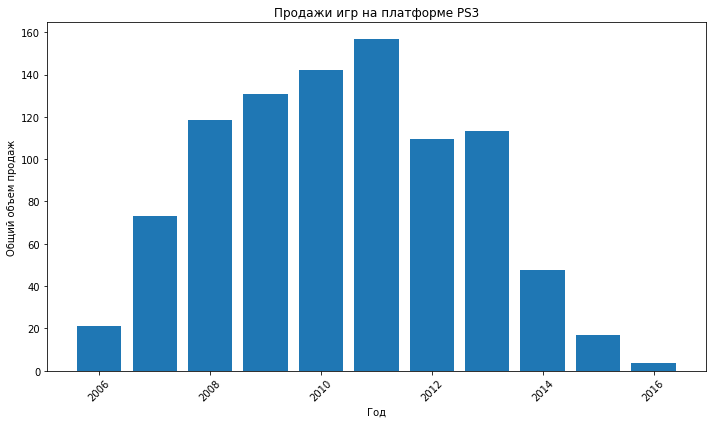

Платформа  Wii
                          total_sales
platform year_of_release             
Wii      2006                  137.15
         2007                  152.77
         2008                  171.32
         2009                  206.97
         2010                  127.95
         2011                   59.65
         2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18


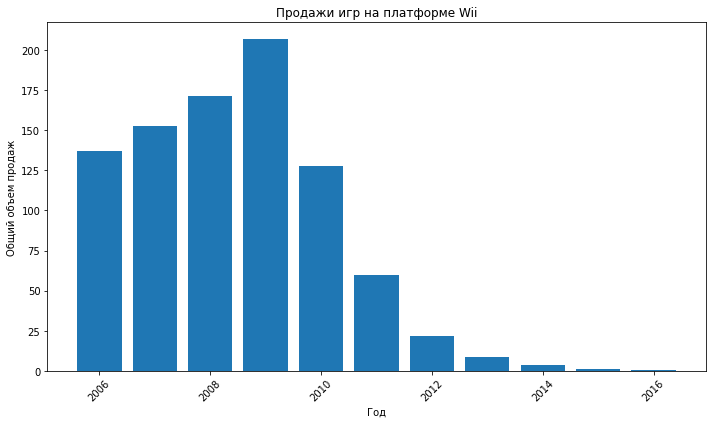

Платформа  DS
                          total_sales
platform year_of_release             
DS       2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.96
         2008                  145.31
         2009                  119.54
         2010                   85.02
         2011                   26.18
         2012                   11.01
         2013                    1.54


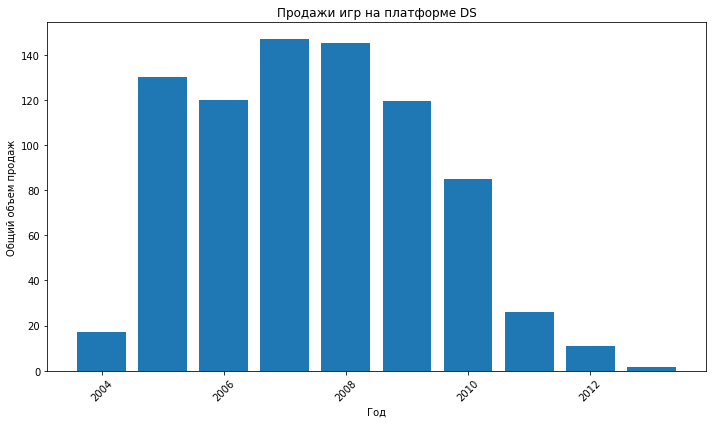

Платформа  PS
                          total_sales
platform year_of_release             
PS       1994                    6.03
         1995                   35.96
         1996                   94.70
         1997                  136.17
         1998                  169.49
         1999                  144.53
         2000                   96.37
         2001                   35.59
         2002                    6.67
         2003                    2.07


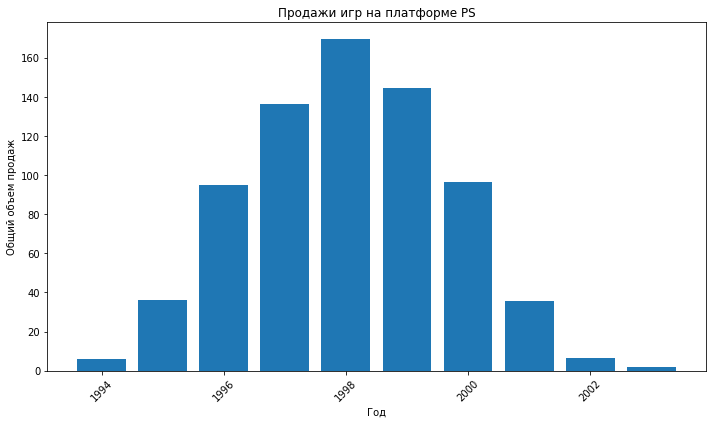

In [42]:
for platform in best_sales_platform:
    print('Платформа ', platform)
    platform_sales_pivot_table = pd.pivot_table(games.query('platform == @platform'), 
                                             index=['platform','year_of_release'], 
                                             values='total_sales', 
                                             aggfunc='sum')
    print(platform_sales_pivot_table)

    # Визуализация
    plt.figure(figsize=(10, 6))  # Установка размера графика
    plt.bar(platform_sales_pivot_table.index.get_level_values('year_of_release'), 
            platform_sales_pivot_table['total_sales'])
    plt.title(f'Продажи игр на платформе {platform}')
    plt.xlabel('Год')
    plt.ylabel('Общий объем продаж')
    plt.xticks(rotation=45)  # Поворот меток оси X
    plt.tight_layout()  # Автоматическое подгонка элементов графика
    plt.show()

<div class="alert alert-block alert-info">
Новые платформы, как мы видим из таблицы, существуют около 10 лет, потом им на замену приходят более совершенные версии
    
Sony обновляет свои игровые платформы каждые 5-7 лет, предлагая новые модели с улучшенными характеристиками. Однако, игры для предыдущих платформ продолжают продаваться на рынке еще в течение 3 лет.

In [43]:
actual_games = games.query('year_of_release > 2012')
actual_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.0+ KB


In [44]:
best_sales_platform = pd.pivot_table(actual_games, index=['platform','year_of_release'], 
                                     values='total_sales', aggfunc = 'sum')
best_sales_platform


total_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

Данные для платформы 3DS:                  total_sales
year_of_release             
2013                   56.57
2014                   43.76
2015                   27.78
2016                   15.14


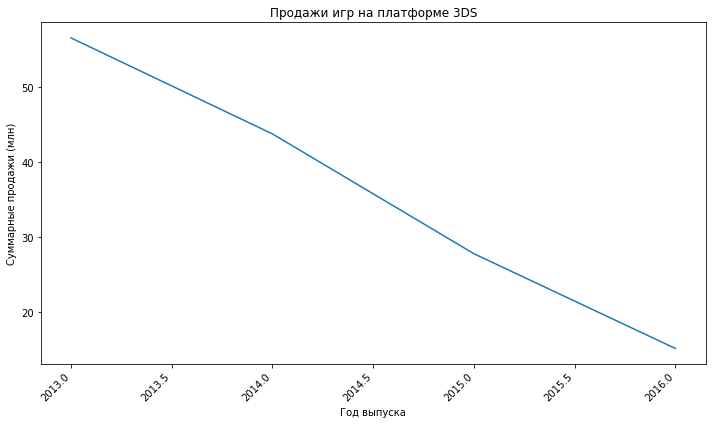

Данные для платформы DS:                  total_sales
year_of_release             
2013                    1.54


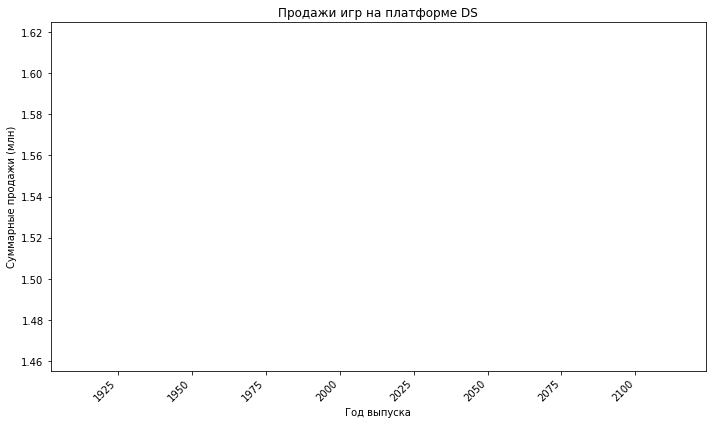

Данные для платформы PC:                  total_sales
year_of_release             
2013                   12.38
2014                   13.28
2015                    8.52
2016                    5.25


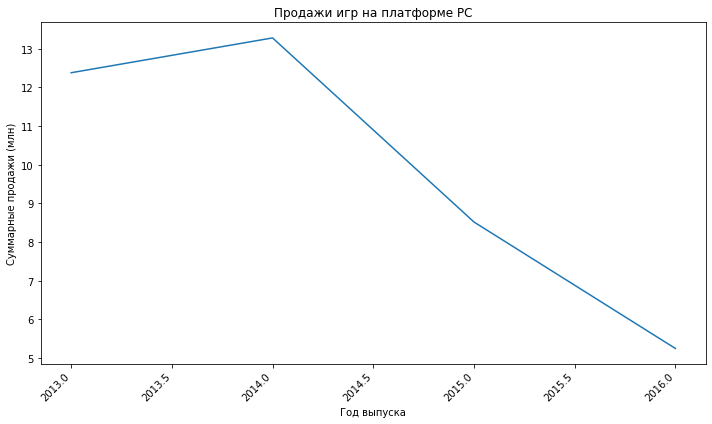

Данные для платформы PS3:                  total_sales
year_of_release             
2013                  113.25
2014                   47.76
2015                   16.82
2016                    3.60


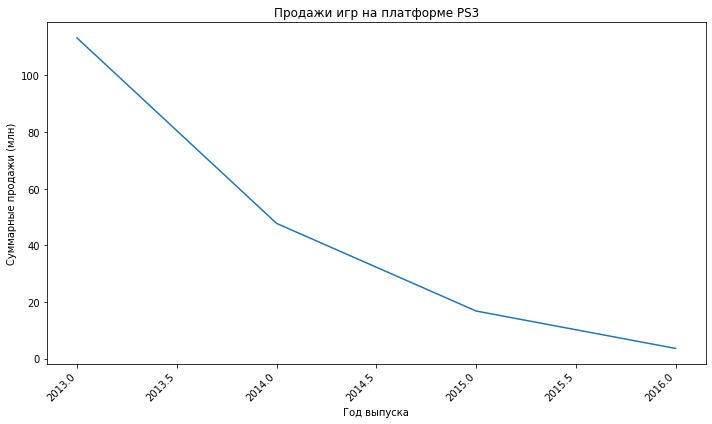

Данные для платформы PS4:                  total_sales
year_of_release             
2013                   25.99
2014                  100.00
2015                  118.90
2016                   69.25


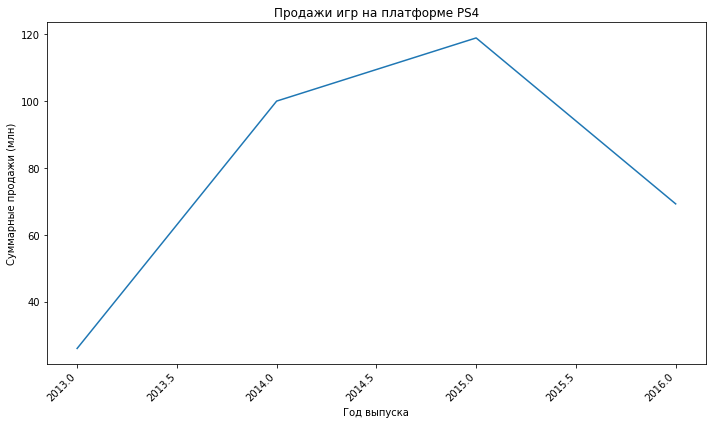

Данные для платформы PSP:                  total_sales
year_of_release             
2013                    3.14
2014                    0.24
2015                    0.12


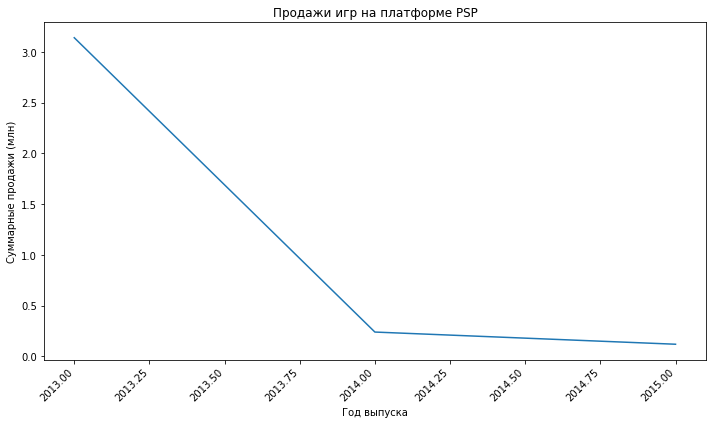

Данные для платформы PSV:                  total_sales
year_of_release             
2013                   10.59
2014                   11.90
2015                    6.25
2016                    4.25


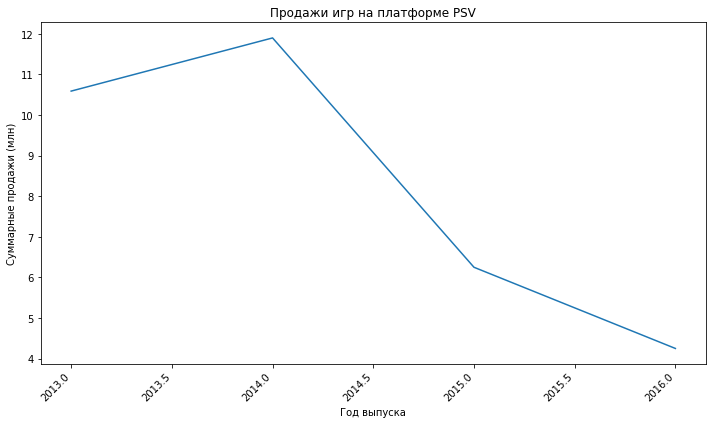

Данные для платформы Wii:                  total_sales
year_of_release             
2013                    8.59
2014                    3.75
2015                    1.14
2016                    0.18


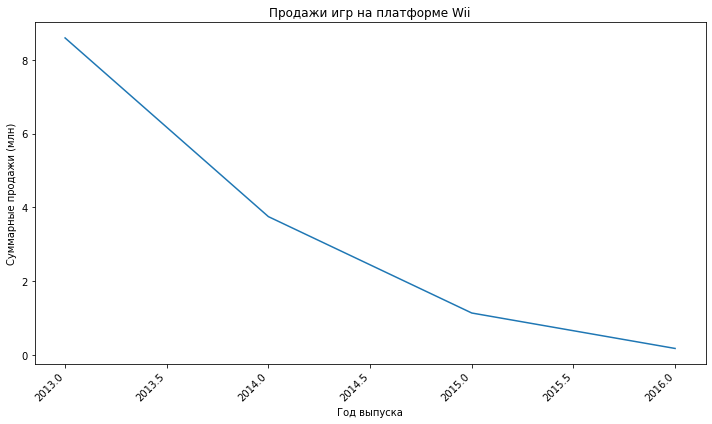

Данные для платформы WiiU:                  total_sales
year_of_release             
2013                   21.65
2014                   22.03
2015                   16.35
2016                    4.60


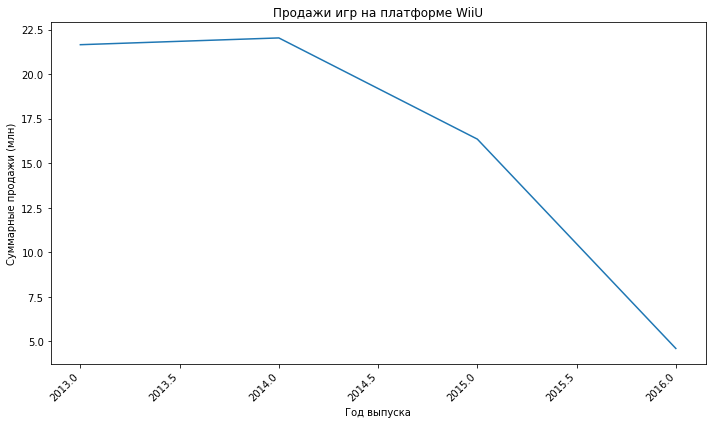

Данные для платформы X360:                  total_sales
year_of_release             
2013                   88.58
2014                   34.74
2015                   11.96
2016                    1.52


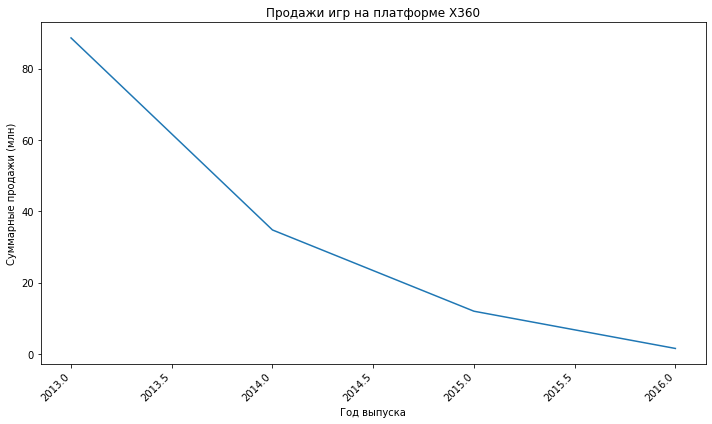

Данные для платформы XOne:                  total_sales
year_of_release             
2013                   18.96
2014                   54.07
2015                   60.14
2016                   26.15


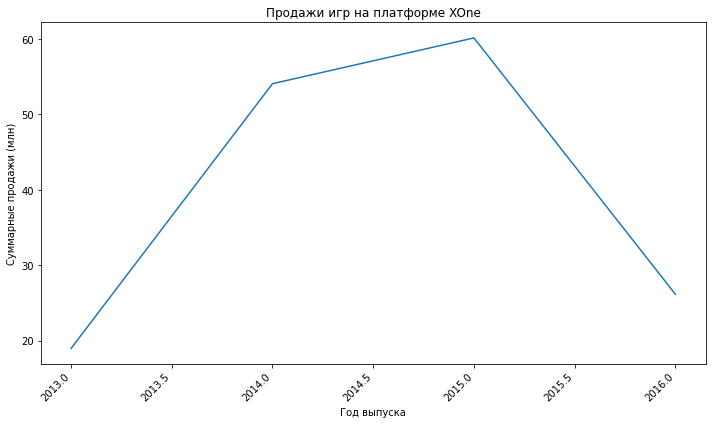

In [ ]:
best_sales_platform = pd.pivot_table(actual_games, index=['platform','year_of_release'], 
                                     values='total_sales', aggfunc = 'sum')


platforms = best_sales_platform.index.get_level_values('platform').unique()

for platform in platforms:
    plt.figure(figsize=(10, 6)) 
    platform_data = best_sales_platform.loc[platform]

    if len(platform_data) > 0:
        print(f"Данные для платформы {platform}: {platform_data}")
        
        plt.plot(platform_data.index, platform_data['total_sales']) 
        plt.title(f'Продажи игр на платформе {platform}')  
        plt.xlabel('Год выпуска')  
        plt.ylabel('Суммарные продажи (млн)')  
    
        plt.xticks(rotation=45, ha='right')  
        plt.tight_layout()  
    
        plt.show()
    else:
        print(f"Предупреждение: Нет данных для платформы {platform}")



In [46]:
best_sales_platform = pd.pivot_table(actual_games, index='platform', 
                                     values='total_sales', aggfunc = 'sum')
best_sales_platform.sort_values('total_sales', ascending=False)
top_platforms = best_sales_platform.sort_values(by='total_sales', ascending=False).index[:5]
top_platforms

Index(['PS4', 'PS3', 'XOne', '3DS', 'X360'], dtype='object', name='platform')

<div class="alert alert-block alert-info">
Пять наиболее популярных игровых платформ в мире - это PS4, PS3, Xbox One, Xbox 360 и 3DS. Их общий доход за последние три года составил около миллиарда долларов.

Продажи PS4, Xbox One, 3DS, Wii U и PSV демонстрируют рост, так как эти платформы заменяют предыдущие поколения игровых приставок. Продажи же PS3, Xbox 360, DS, Wii и PSP, наоборот, сокращаются. Наблюдается также увеличение продаж игр для ПК.

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

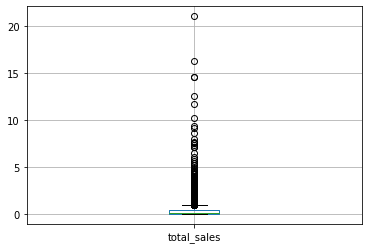

In [47]:
actual_games.boxplot(column = 'total_sales')
actual_games['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

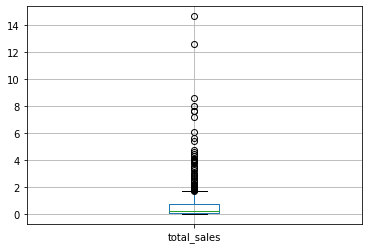

In [48]:
PS4_actual_games = actual_games.query('platform =="PS4"')
PS4_actual_games.boxplot(column = 'total_sales')
PS4_actual_games['total_sales'].describe()

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64

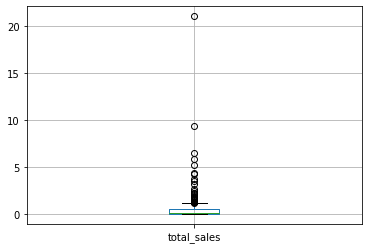

In [49]:
PS3_actual_games = actual_games.query('platform =="PS3"')
PS3_actual_games.boxplot(column = 'total_sales')
PS3_actual_games['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

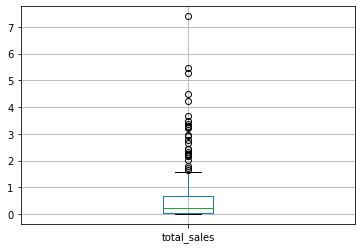

In [50]:
XOne_actual_games = actual_games.query('platform =="XOne"')
XOne_actual_games.boxplot(column = 'total_sales')
XOne_actual_games['total_sales'].describe()

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64

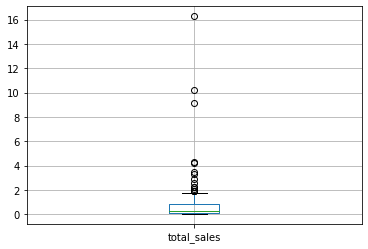

In [51]:
X360_actual_games = actual_games.query('platform =="X360"')
X360_actual_games.boxplot(column = 'total_sales')
X360_actual_games['total_sales'].describe()

Данные для диаграммы размаха: [31       14.63
42       12.62
77        8.58
87        7.98
92        7.66
         ...  
16500     0.01
16503     0.01
16526     0.01
16530     0.01
16585     0.01
Name: total_sales, Length: 392, dtype: float64, 16       21.05
69        9.36
126       6.46
149       5.86
180       5.27
         ...  
16558     0.01
16638     0.01
16674     0.01
16691     0.01
16710     0.01
Name: total_sales, Length: 345, dtype: float64, 99       7.39
165      5.47
179      5.26
242      4.49
270      4.22
         ... 
16630    0.01
16643    0.01
16645    0.01
16660    0.01
16672    0.01
Name: total_sales, Length: 247, dtype: float64, 33       14.60
47       11.68
96        7.55
108       7.14
184       5.22
         ...  
16608     0.01
16610     0.01
16648     0.01
16668     0.01
16677     0.01
Name: total_sales, Length: 303, dtype: float64, 23       16.27
60       10.24
72        9.18
263       4.28
271       4.22
         ...  
16301     0.01
16450     0.01
16460   

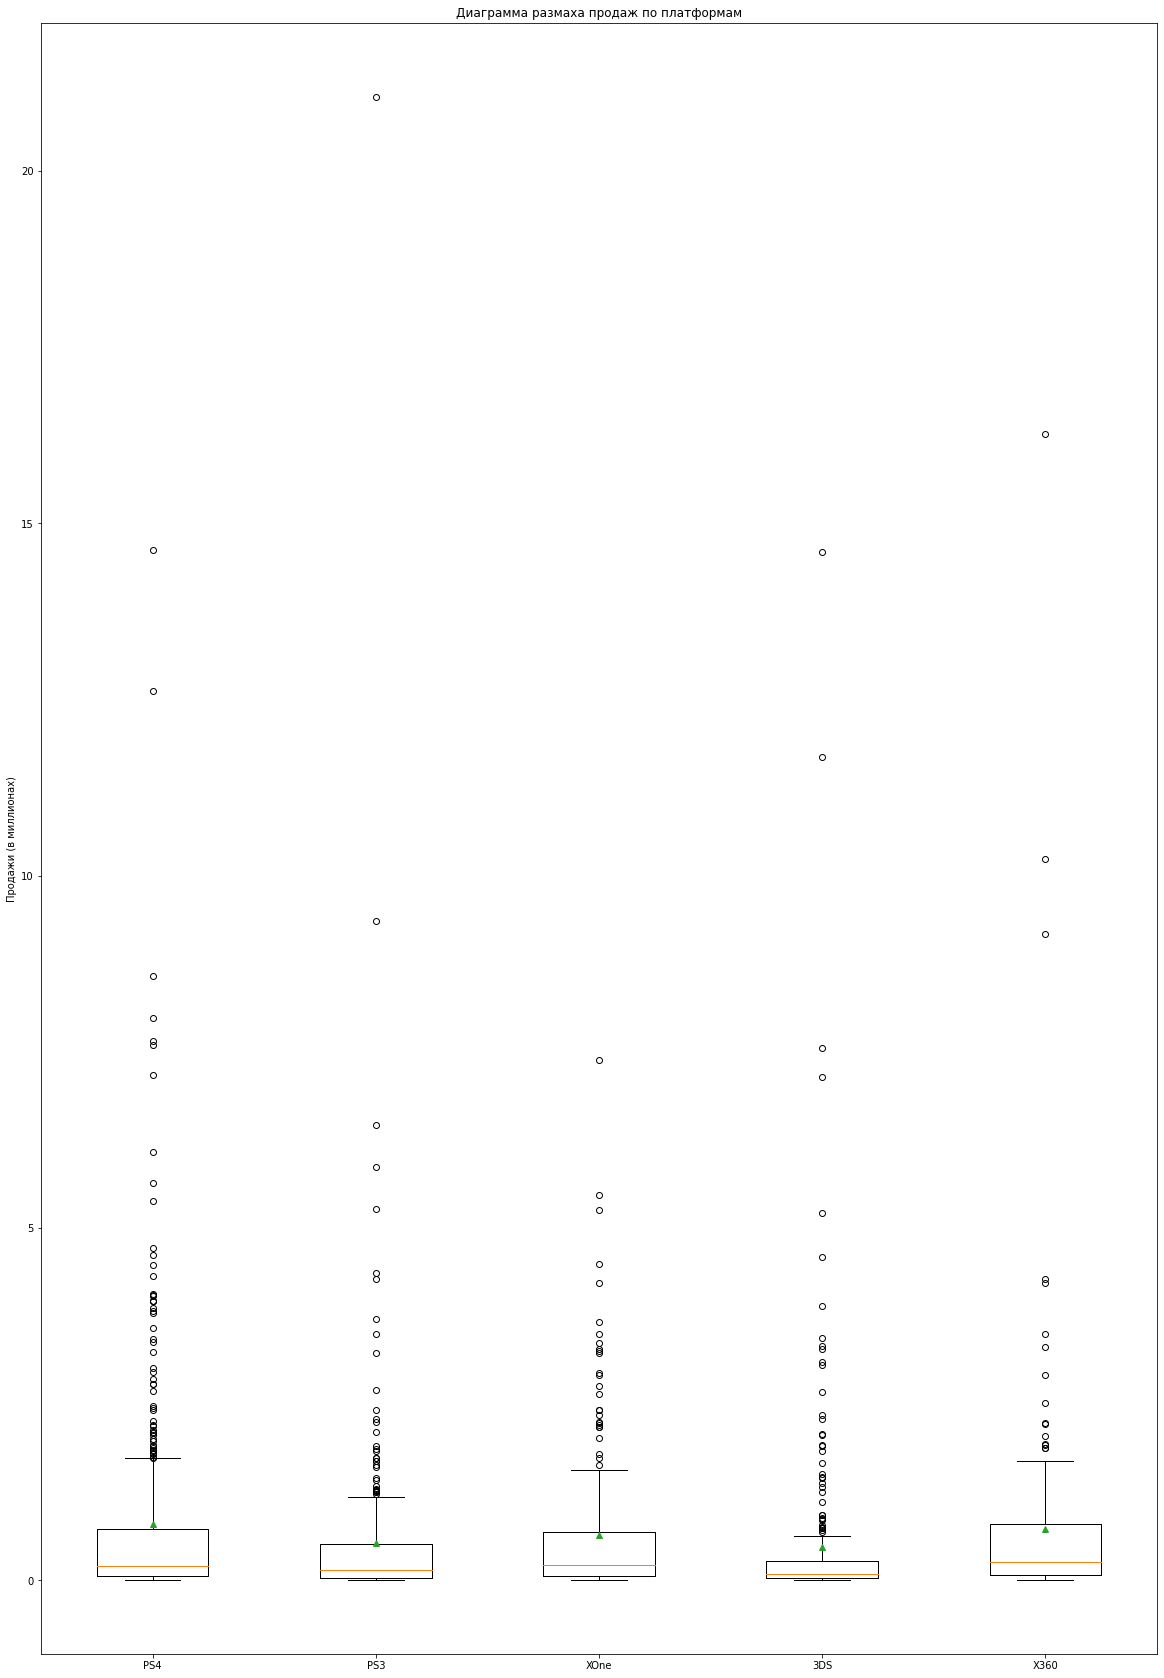

In [52]:
for platform in top_platforms:
    if len(actual_games[actual_games['platform'] == platform]) == 0:
        print(f"Предупреждение: Нет данных для платформы {platform}")


data = []
for platform in top_platforms:
    sales_data = actual_games[actual_games['platform'] == platform]['total_sales']
    if len(sales_data) > 0:  
        data.append(sales_data)
    else:
        print(f"Предупреждение: Нет данных для платформы {platform}")


print(f"Данные для диаграммы размаха: {data}")


plt.figure(figsize=(20, 30))
plt.boxplot(data, labels=top_platforms, showmeans=True)  # Убираем patch_artist=True
plt.title('Диаграмма размаха продаж по платформам')
plt.ylabel('Продажи (в миллионах)')

plt.yticks(range(0, 25, 5))

plt.show()

<div class="alert alert-block alert-info">
Продажи игр варьируются значительно. Существуют несколько крайне успешных игр, которые приносят значительные доходы в течение многих лет, но их очень мало. Большинство игр не смогли превзойти порог в 400 тысяч долларов за период с 2013 по 2016 год.

Общая статистика:

Средняя выручка на игру: 488 тысяч долларов.
75% игр: заработали менее 400 тысяч долларов.
Рекорд: 21 миллион долларов.

Статистика по платформам:

PS4: средняя выручка 801 тысяч долларов, 75% игр заработали менее 730 тысяч долларов, рекорд 14,6 миллионов долларов.
    
PS3: средняя выручка 526 тысяч долларов, 75% игр заработали менее 510 тысяч долларов, рекорд 21 миллион долларов.
    
XOne: средняя выручка 645 тысяч долларов, 75% игр заработали менее 685 тысяч долларов, рекорд 7,4 миллиона долларов.
    
X360: средняя выручка 735 тысяч долларов, 75% игр заработали менее 795 тысяч долларов, рекорд 16,3 миллиона долларов.
 

Тенденции:

PS4, PS3 демонстрируют положительную тенденцию в продажах игр. Средняя выручка выше, чем третий квартиль, что указывает на то, что на этих платформах выходят более популярные и успешные игры, чем на Xbox One и Xbox 360.

In [53]:
XOne_ratings = XOne_actual_games.loc[:,['total_sales', 'critic_score', 'user_score']]
XOne_ratings['critic_score'] = XOne_ratings['critic_score'] / 10
XOne_ratings = XOne_ratings[(XOne_ratings['critic_score'] > 0) & (XOne_ratings['critic_score'] < 11)]
XOne_ratings = XOne_ratings[(XOne_ratings['user_score'] > 0) & (XOne_ratings['user_score'] < 11)]
XOne_ratings

,total_sales,critic_score,user_score
165,5.47,9.7,7.9
179,5.26,8.1,5.4
242,4.49,8.4,6.4
270,4.22,8.8,6.2
373,3.50,7.2,4.1
...,...,...,...
16322,0.01,6.6,7.5
16392,0.01,5.3,6.3
16597,0.01,6.5,6.0
16630,0.01,6.3,8.2


In [54]:
PS4_ratings = PS4_actual_games.loc[:,['total_sales', 'critic_score', 'user_score']]
PS4_ratings['critic_score'] = PS4_ratings['critic_score'] / 10
PS4_ratings = PS4_ratings[(PS4_ratings['critic_score'] > 0) & (PS4_ratings['critic_score'] < 11)]
PS4_ratings = PS4_ratings[(PS4_ratings['user_score'] > 0) & (PS4_ratings['user_score'] < 11)]
PS4_ratings

,total_sales,critic_score,user_score
42,12.62,9.7,8.3
77,8.58,8.2,4.3
92,7.66,8.3,5.7
94,7.60,8.5,5.0
105,7.17,8.7,6.5
...,...,...,...
16486,0.01,4.2,2.3
16499,0.01,7.0,6.8
16500,0.01,6.9,7.5
16526,0.01,6.1,7.9


In [55]:
PS4_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

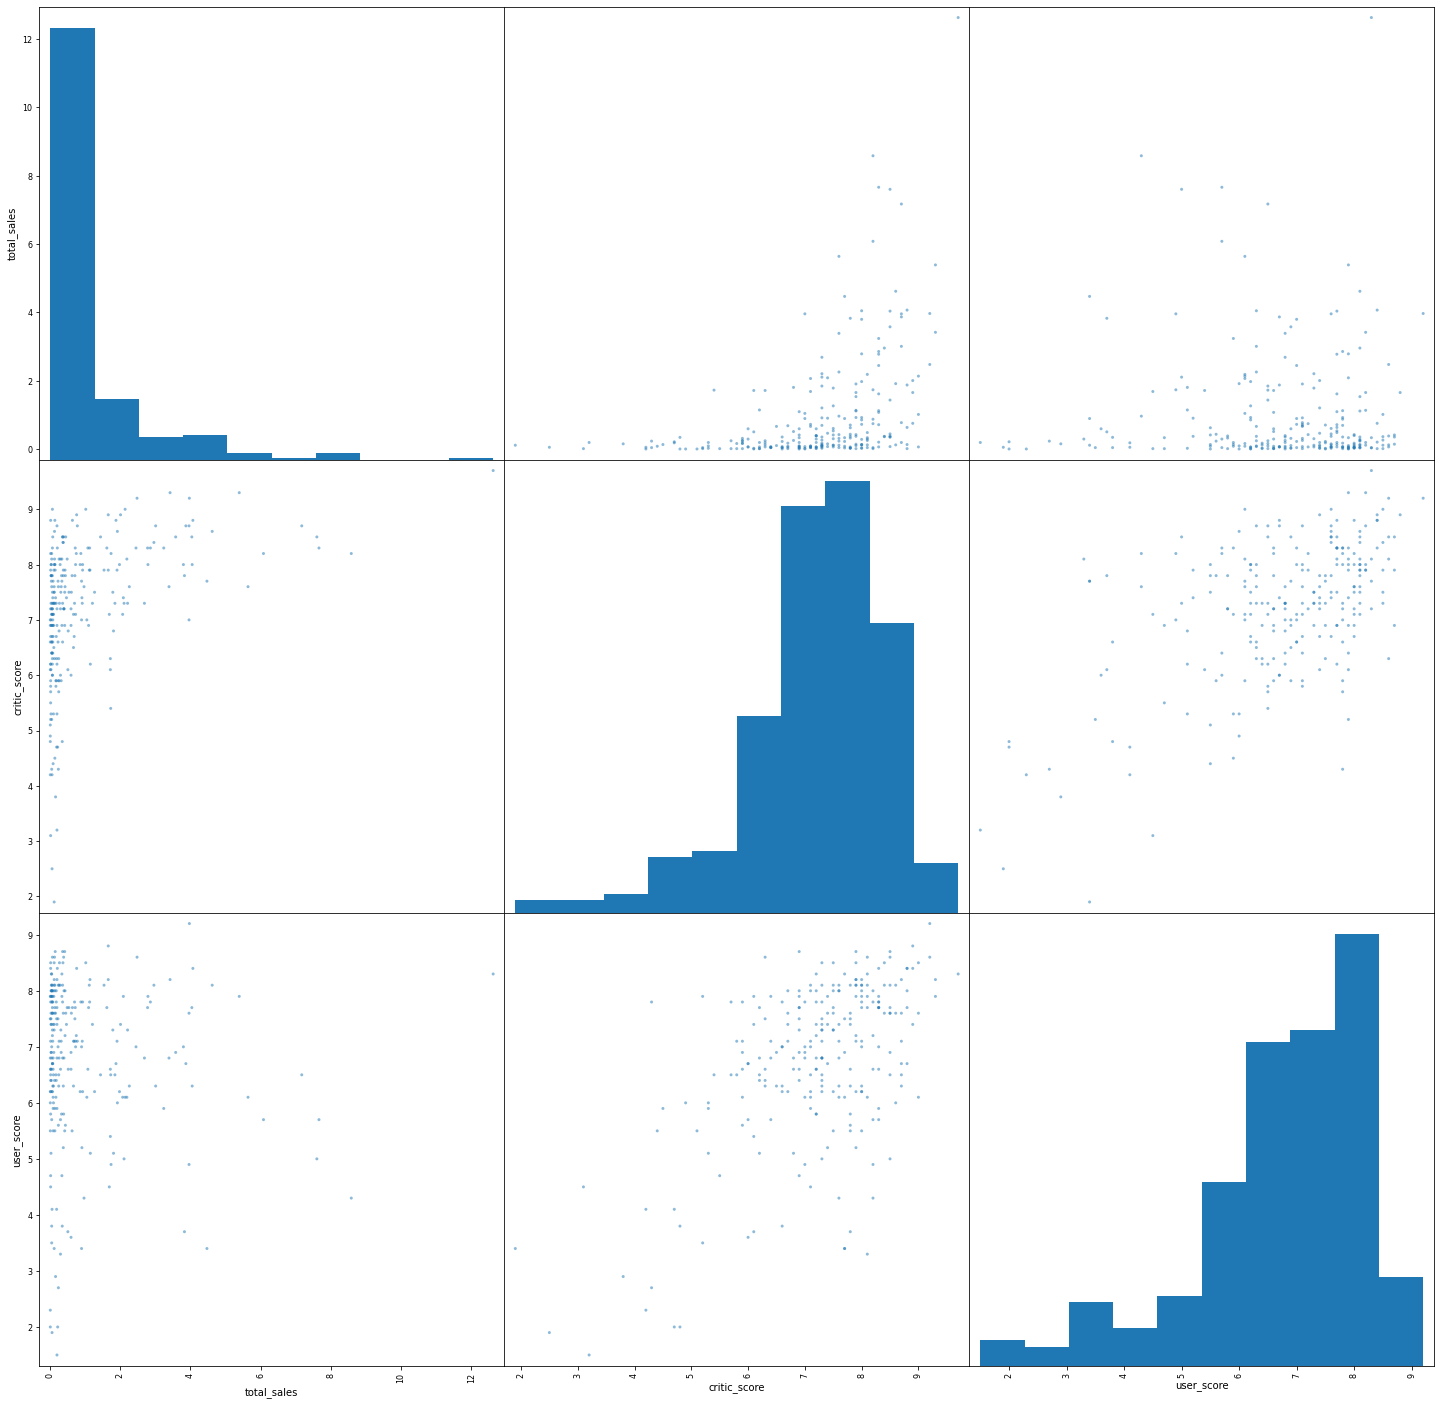

In [56]:
pd.plotting.scatter_matrix(PS4_ratings, figsize=(25, 25))

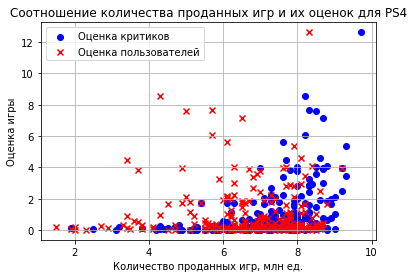

In [57]:
plt.scatter(PS4_ratings['critic_score'], PS4_ratings['total_sales'], label="Оценка критиков", marker="o", color="blue")
plt.scatter(PS4_ratings['user_score'], PS4_ratings['total_sales'], label="Оценка пользователей", marker="x", color="red")
plt.xlabel("Количество проданных игр, млн ед.")
plt.ylabel("Оценка игры")
plt.title("Соотношение количества проданных игр и их оценок для PS4")
plt.legend()
plt.grid(True)
plt.show()

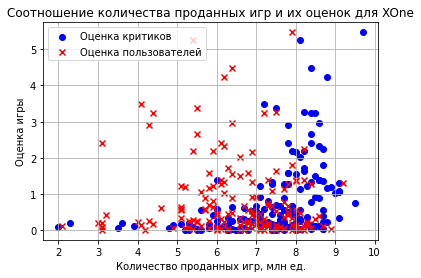

In [58]:
plt.scatter(XOne_ratings['critic_score'], XOne_ratings['total_sales'], label="Оценка критиков", marker="o", color="blue")
plt.scatter(XOne_ratings['user_score'], XOne_ratings['total_sales'], label="Оценка пользователей", marker="x", color="red")
plt.xlabel("Количество проданных игр, млн ед.")
plt.ylabel("Оценка игры")
plt.title("Соотношение количества проданных игр и их оценок для XOne")
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
Я решил поделить рейтинг критиков на 10, чтобы было нагляднее. Очевидно, что чем больше оценка игры, тем больше проданных экземпляров, как для рейтинга пользователей, так и для рейтинга критиков.
Однако наблюдаются незначительные выбросы в оценках пользователей. Это объясняется субъективностью человека, кому-то игра понравилась, кому-то - нет. А критики должны быть объективны, поэтому у них выбросов практически нет.
    
У XOne наблюдается аналогичная тенденция: чем выше оценка критиков и пользователей, тем больше проданных игр.
    
Конечно, нельзя сделать вывод обо всех платформах сразу, но мне кажется, что у большинства наблюдается такая же тенденция.
    
Чем выше оценка игры, тем больше копий будет продано, особенно если речь идет об оценке критиков, поскольку они более авторитетны и объективны.

In [59]:
X360_ratings = X360_actual_games.loc[:,['total_sales', 'critic_score', 'user_score']]
X360_ratings.head()

,total_sales,critic_score,user_score
23,16.27,97.0,8.1
60,10.24,73.0,2.6
72,9.18,NaN,NaN
263,4.28,NaN,4.9
271,4.22,84.0,4.2


In [60]:
X360_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

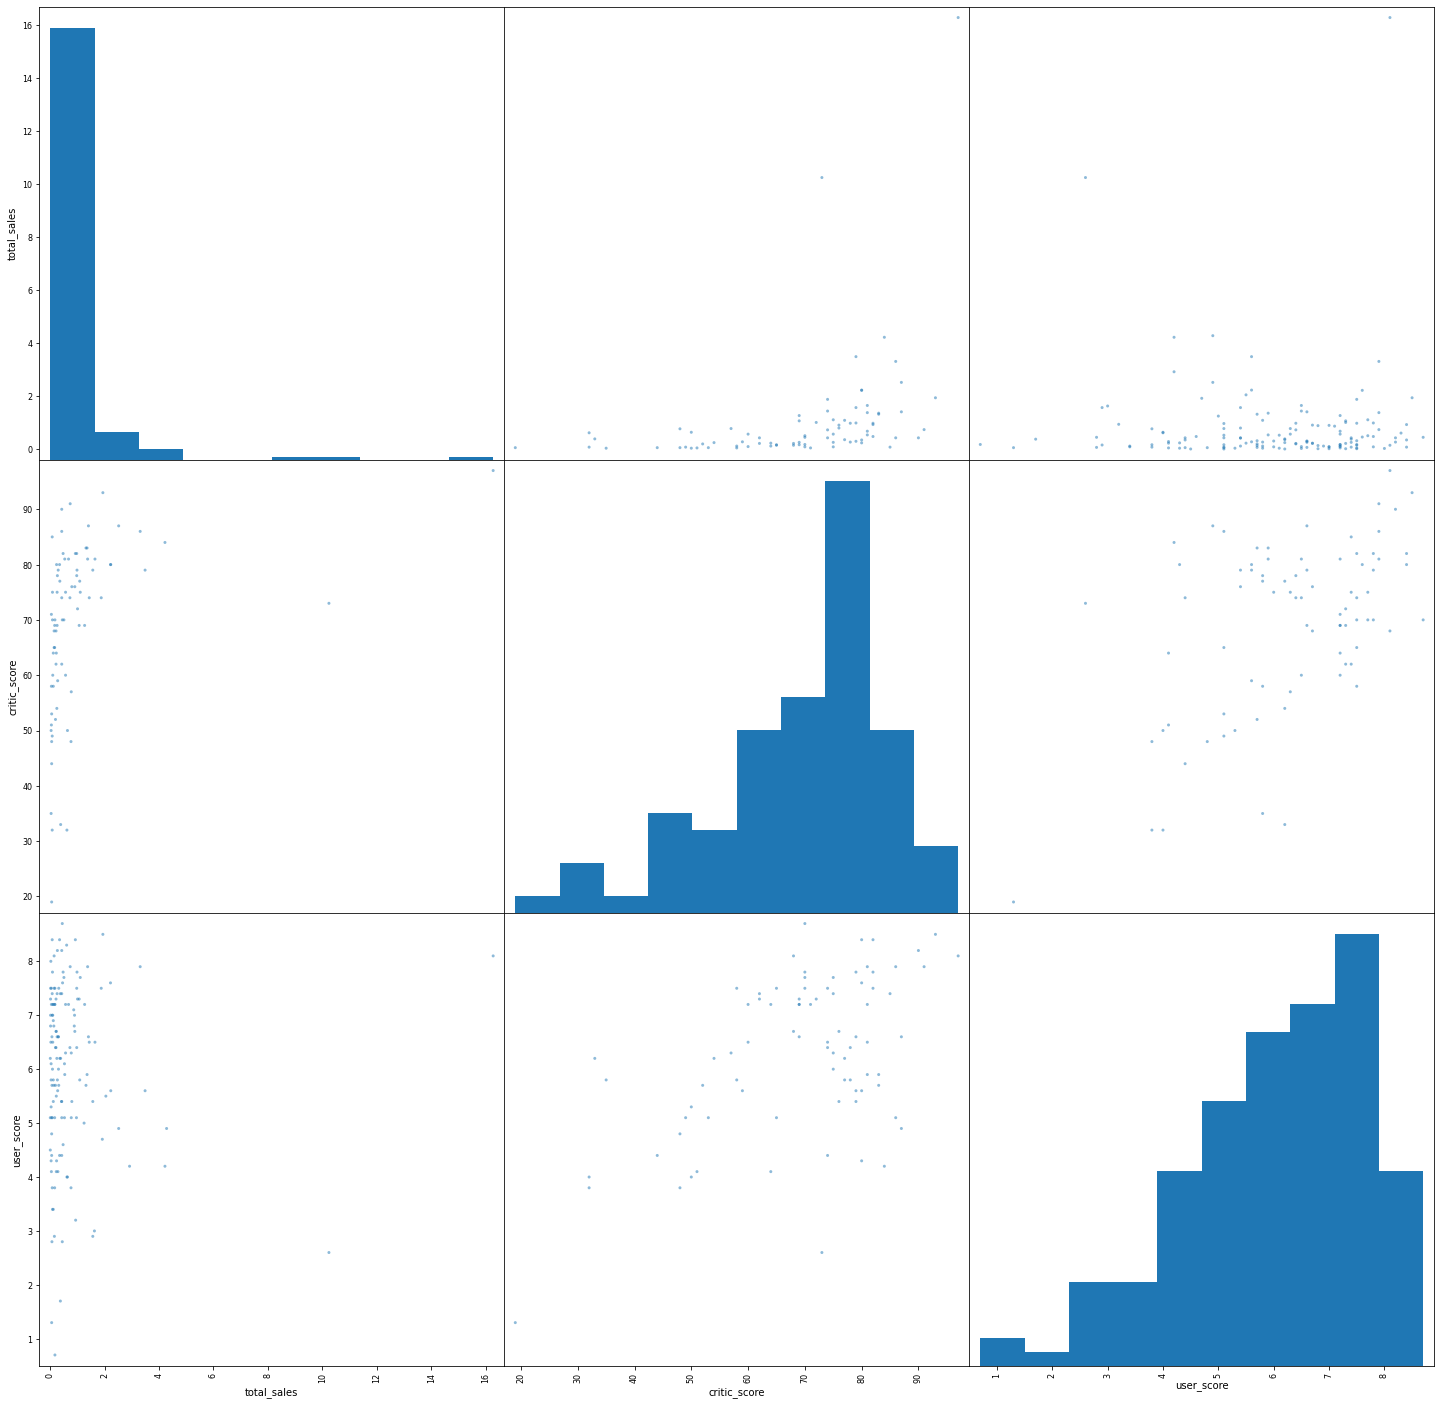

In [61]:
pd.plotting.scatter_matrix(X360_ratings, figsize=(25, 25))

In [62]:
XOne_ratings = XOne_actual_games.loc[:,['total_sales', 'critic_score', 'user_score']]
XOne_ratings.head()

,total_sales,critic_score,user_score
99,7.39,NaN,NaN
165,5.47,97.0,7.9
179,5.26,81.0,5.4
242,4.49,84.0,6.4
270,4.22,88.0,6.2


In [63]:
XOne_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

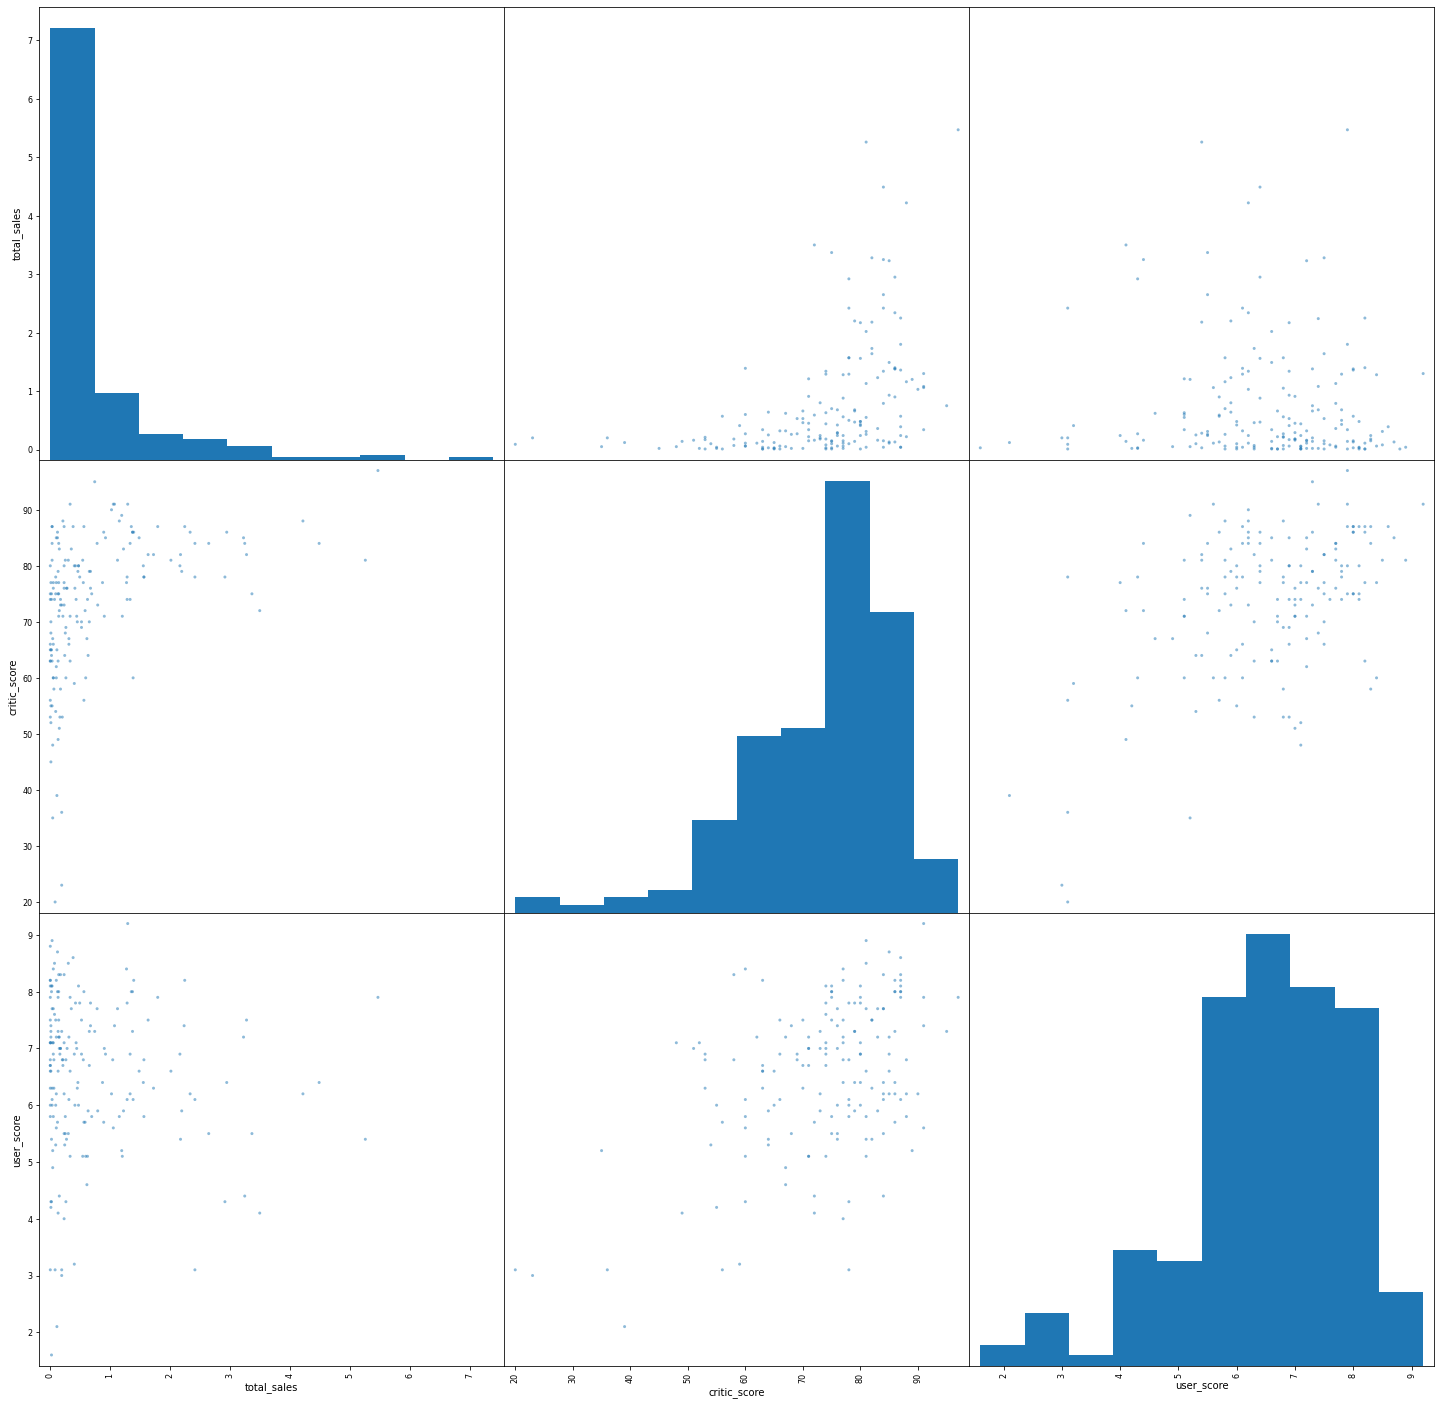

In [64]:
pd.plotting.scatter_matrix(XOne_ratings, figsize=(25, 25))

<div class="alert alert-block alert-info">
На платформах Xbox One и Xbox 360 также наблюдается схожая взаимосвязь между оценками критиков и прибылью, как и на PS4.

In [65]:
genre_pivot_table = pd.pivot_table(actual_games, index='genre', values='total_sales', aggfunc='sum')
total_sales = genre_pivot_table.sort_values('total_sales', ascending=False)
genre_pivot_table.sort_values('total_sales', ascending=False)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


In [66]:
total_games = games['genre'].value_counts()


In [67]:
profit_per_game = genre_pivot_table.join(total_games, how='outer', lsuffix='_sales', rsuffix='_count')


profit_per_game.columns = ['total_game_sales', 'game_count']

profit_per_game['profit_per_game'] = profit_per_game['total_game_sales'] / profit_per_game['game_count']

profit_per_game = profit_per_game.sort_values('profit_per_game', ascending=False)

print(profit_per_game)

              total_game_sales  game_count  profit_per_game
Shooter                 232.98        1296         0.179769
Role-Playing            145.89        1481         0.098508
Action                  321.87        3307         0.097330
Sports                  150.65        2305         0.065358
Platform                 42.63         878         0.048554
Fighting                 35.31         837         0.042186
Misc                     62.82        1721         0.036502
Racing                   39.89        1226         0.032537
Simulation               21.76         857         0.025391
Adventure                23.64        1293         0.018283
Strategy                 10.08         673         0.014978
Puzzle                    3.17         569         0.005571


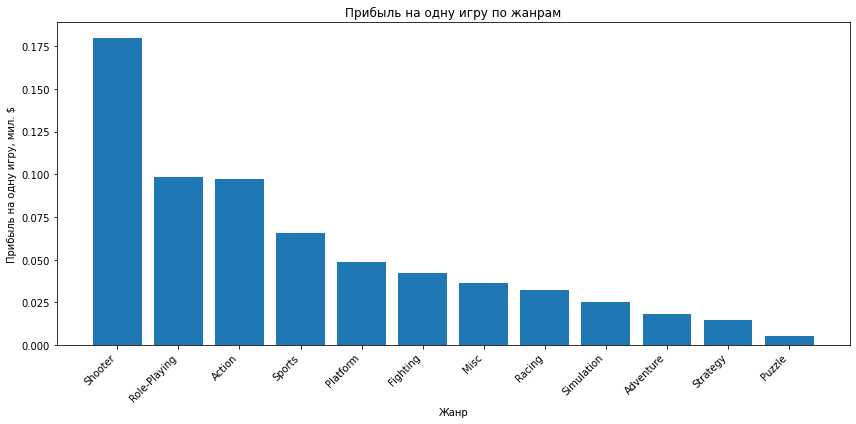

In [68]:
plt.figure(figsize=(12, 6))  
plt.bar(profit_per_game.index, profit_per_game['profit_per_game'])  
plt.title('Прибыль на одну игру по жанрам')  
plt.xlabel('Жанр')  
plt.ylabel('Прибыль на одну игру, мил. $')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

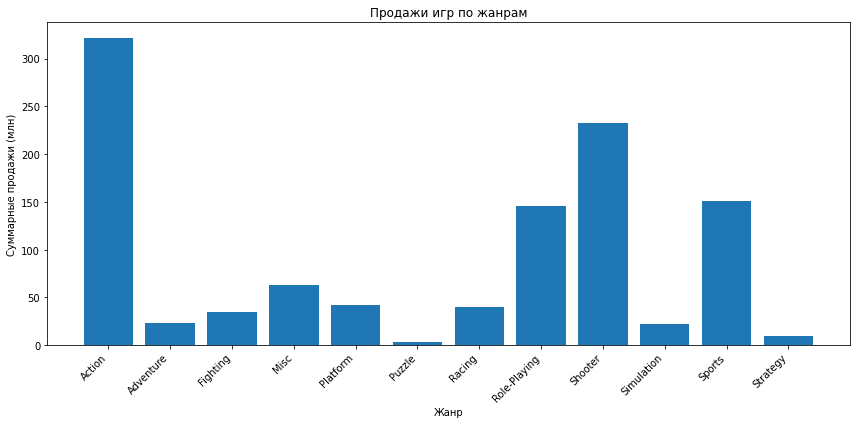

In [69]:
plt.figure(figsize=(12, 6))  
plt.bar(genre_pivot_table.index, genre_pivot_table['total_sales'])  
plt.title('Продажи игр по жанрам')  
plt.xlabel('Жанр')  
plt.ylabel('Суммарные продажи (млн)')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

<div class="alert alert-block alert-info">
Лидеры продаж:

Экшен (Action): является одним из самых популярных жанров, в значительной степени благодаря истории игровой индустрии и желанию игроков продемонстрировать свою ловкость и реакцию. Жанр Misc имеет схожий характер и также пользуется популярностью.
Шутеры (Shooter): популярность обусловлена возможностью многопользовательской игры и соревнованиями между игроками (1х1, 2х2, 3х3, 5х5 и т.д.).
Спортивные игры (Sports): также часто предлагают многопользовательский режим и соревнования между игроками.
Ролевые игры (Role-Playing): привлекают игроков своей сложностью и возможностью пройти игру несколько раз, что повышает интерес к дополнениям и увеличивает вероятность рекомендаций друзьям.

Менее популярные жанры:

Приключения (Adventure): 
Симуляторы (Simulation):
Стратегии (Strategy): 
Головоломки (Puzzle):

Причины снижения популярности:

Головоломки: в отличие от 80-х годов, современное поколение игроков предпочитает динамичные игры с активным действием.
Приключения: схожая тенденция с головоломками.
Симуляторы: предлагают возможность погружения в реальную жизнь или ее аспекты, что привлекает ограниченный круг игроков.
Стратегии: часто отличаются сложностью и медленным темпом игры, что не всегда привлекает широкую аудиторию

# Общий вывод

Мы рассмотрели все поставленные вопросы и подкрепили наши рассуждения обоснованиями.

Прогноз на 2017 год: ожидается рост продаж игр на платформах PS4, Xbox One. Многие студии-разработчики уже освоили технологии этих платформ и стремятся выйти на все рынки.

In [70]:
na_actual_games = actual_games.query('na_sales > 0')

In [71]:
eu_actual_games = actual_games.query('eu_sales > 0')

In [72]:
jp_actual_games = actual_games.query('jp_sales > 0')

In [73]:
na_pivot_table = pd.pivot_table(na_actual_games, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_pivot_table

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


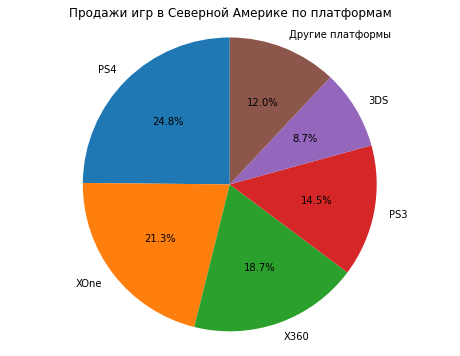

In [74]:
na_other_platforms = na_pivot_table[5:].sum()
top_5_na_platforms = na_pivot_table.sort_values('na_sales', ascending=False).index[:5]

na_pivot_table.loc['Другие платформы'] = na_pivot_table.loc[~na_pivot_table.index.isin(top_5_na_platforms)].sum()

na_pivot_table = na_pivot_table.loc[top_5_na_platforms.tolist() + ['Другие платформы']]


plt.figure(figsize=(8, 6))  
plt.pie(na_pivot_table['na_sales'], labels=na_pivot_table.index, autopct='%1.1f%%', startangle=90)  # Строим круговую диаграмму
plt.title('Продажи игр в Северной Америке по платформам') 
plt.axis('equal')

plt.show()

In [75]:
eu_pivot_table = pd.pivot_table(eu_actual_games, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_pivot_table

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


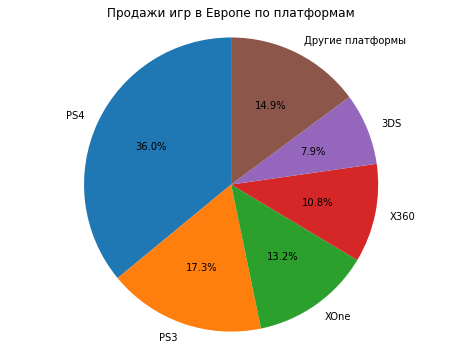

In [76]:
eu_other_platforms = eu_pivot_table[5:].sum()
top_5_eu_platforms = eu_pivot_table.sort_values('eu_sales', ascending=False).index[:5]

eu_pivot_table.loc['Другие платформы'] = eu_pivot_table.loc[~eu_pivot_table.index.isin(top_5_eu_platforms)].sum()

eu_pivot_table = eu_pivot_table.loc[top_5_eu_platforms.tolist() + ['Другие платформы']]


plt.figure(figsize=(8, 6))  
plt.pie(eu_pivot_table['eu_sales'], labels=eu_pivot_table.index, autopct='%1.1f%%', startangle=90) 
plt.title('Продажи игр в Европе по платформам') 
plt.axis('equal')

plt.show()

In [77]:
jp_pivot_table = pd.pivot_table(jp_actual_games, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_pivot_table

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


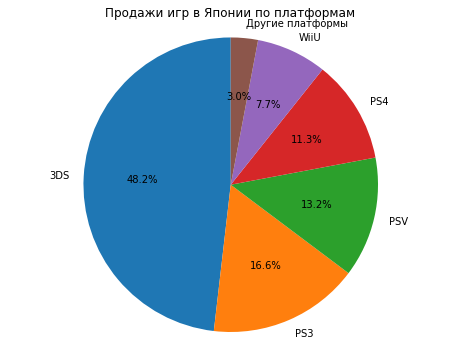

In [78]:
jp_other_platforms = jp_pivot_table[5:].sum()
top_5_jp_platforms = jp_pivot_table.sort_values('jp_sales', ascending=False).index[:5]

jp_pivot_table.loc['Другие платформы'] = jp_pivot_table.loc[~jp_pivot_table.index.isin(top_5_jp_platforms)].sum()

jp_pivot_table = jp_pivot_table.loc[top_5_jp_platforms.tolist() + ['Другие платформы']]


plt.figure(figsize=(8, 6))  
plt.pie(jp_pivot_table['jp_sales'], labels=jp_pivot_table.index, autopct='%1.1f%%', startangle=90)  # Строим круговую диаграмму
plt.title('Продажи игр в Японии по платформам') 
plt.axis('equal')

plt.show()

<div class="alert alert-block alert-info">

Топ-5 платформ по регионам:

Северная Америка: PS4, Xbox One, Xbox 360, PS3, 3DS
Европейский регион: PS4, PS3, Xbox One, Xbox 360, 3DS
Япония: 3DS, PS3, PSV, PS4, Wii U

Ключевые факторы популярности:

Влияние компании: Во всех регионах в топ-5 присутствуют продукты Sony, что свидетельствует о ее сильном влиянии на игровой рынок.
Местоположение компании: Microsoft, будучи крупным игроком на Американском рынке, имеет высокую популярность своими платформами Xbox One и Xbox 360. В Японии Nintendo также доминирует с 3DS и Wii U. 
   
Европейский рынок более нейтрален к региональным факторам, отдавая предпочтение общей популярности платформы.

Региональные особенности:

Северная Америка: PS4 и Xbox One ведут ожесточенную конкуренцию, Microsoft стремится сохранить лидерство в своем регионе.
    
Европа: PS4 является бесспорным лидером, так как отсутствует сильная конкуренция от других производителей.
    
Япония: Nintendo и Sony соревнуются за пользователей, Nintendo имеет успех в своем родном регионе, но ее продукты менее популярны за его пределами. В целом, продажи игр в Японии ниже, чем в других регионах, из-за меньшего количества игроков.

In [79]:
na_genre_pivot_table = pd.pivot_table(na_actual_games, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre_pivot_table

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [80]:
eu_genre_pivot_table = pd.pivot_table(eu_actual_games, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre_pivot_table

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


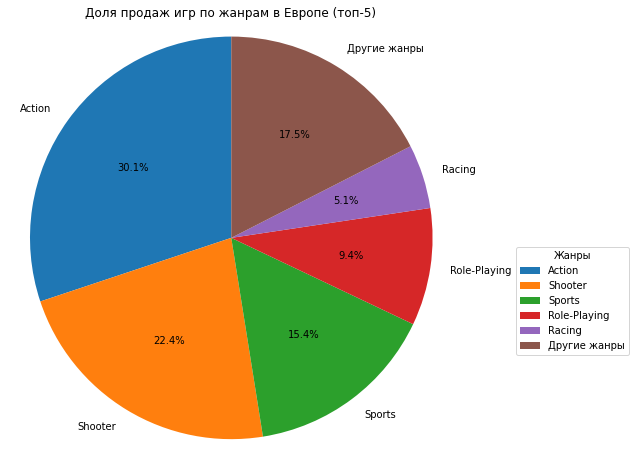

In [81]:
top_5_genres = eu_genre_pivot_table.head(5)
other_genres = pd.DataFrame({'eu_sales': [eu_genre_pivot_table['eu_sales'].sum() - top_5_genres['eu_sales'].sum()]}, index=['Другие жанры'])
combined_genres = pd.concat([top_5_genres, other_genres])
plt.figure(figsize=(8, 8))
plt.pie(combined_genres['eu_sales'], labels=combined_genres.index, autopct='%1.1f%%', startangle=90) 


plt.title('Доля продаж игр по жанрам в Европе (топ-5)')
plt.legend(title='Жанры', loc='best', bbox_to_anchor=(1, 0.5), bbox_transform=plt.gcf().transFigure)
plt.axis('equal')
plt.show()


In [82]:
jp_genre_pivot_table = pd.pivot_table(jp_actual_games, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre_pivot_table

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


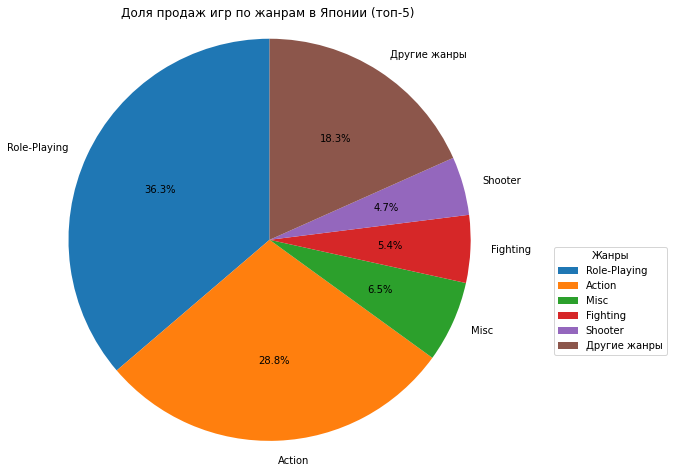

In [83]:
top_5_genres = jp_genre_pivot_table.head(5)
other_genres = pd.DataFrame({'jp_sales': [jp_genre_pivot_table['jp_sales'].sum() - top_5_genres['jp_sales'].sum()]}, index=['Другие жанры'])
combined_genres = pd.concat([top_5_genres, other_genres])
plt.figure(figsize=(8, 8))
plt.pie(combined_genres['jp_sales'], labels=combined_genres.index, autopct='%1.1f%%', startangle=90)
plt.title('Доля продаж игр по жанрам в Японии (топ-5)')
plt.legend(title='Жанры', loc='best', bbox_to_anchor=(1, 0.5), bbox_transform=plt.gcf().transFigure)
plt.axis('equal')  
plt.show()

<div class="alert alert-block alert-info">

Топ-5 жанров по регионам:

Северная Америка: Экшен, Шутеры, Спортивные игры, Ролевые игры, Misc
Европейский регион: Экшен, Шутеры, Спортивные игры, Ролевые игры, Гонки
Япония: Ролевые игры, Экшен, Misc, Боевые игры, Шутеры

Жанр Misc (Miscellaneous): 

Относится к категории игр, где проверяются ловкость и реакция игрока нестандартными способами. Эти игры не входят в категории боевых игр, лабиринтов, спортивных игр, игр с мячом или гонок. 

Сходства и различия:

Северная Америка и Европа: игроки в этих регионах имеют схожие предпочтения в жанрах.
Япония: Отличается большим интересом к играм с глубоким смыслом, что объясняет высокую популярность ролевых игр.

Всеобщая популярность:

Экшен: остается популярным жанром во всех регионах благодаря своей истории и привлекательности для многих поколений игроков.
Шутеры: также пользуются популярностью, так как предлагают возможность имитировать боевые действия.

In [84]:
na_rating_pivot_table = pd.pivot_table(na_actual_games, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating_pivot_table

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


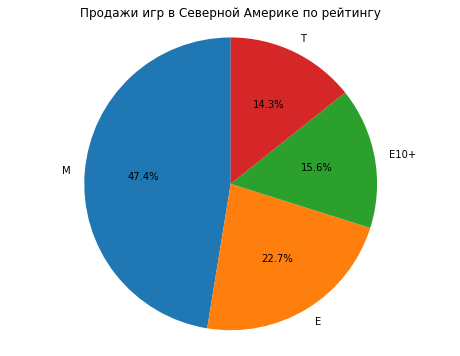

In [85]:
plt.figure(figsize=(8, 6)) 
plt.pie(na_rating_pivot_table['na_sales'], labels=na_rating_pivot_table.index, autopct='%1.1f%%', startangle=90)  
plt.title('Продажи игр в Северной Америке по рейтингу')  
plt.axis('equal')  

plt.show()

In [86]:
eu_rating_pivot_table = pd.pivot_table(eu_actual_games, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating_pivot_table

,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


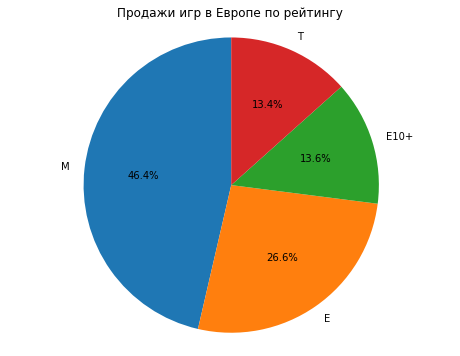

In [87]:
plt.figure(figsize=(8, 6)) 
plt.pie(eu_rating_pivot_table['eu_sales'], labels=eu_rating_pivot_table.index, autopct='%1.1f%%', startangle=90)  # Строим круговую диаграмму
plt.title('Продажи игр в Европе по рейтингу')  
plt.axis('equal')  

plt.show()

In [88]:
jp_rating_pivot_table = pd.pivot_table(jp_actual_games, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating_pivot_table

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


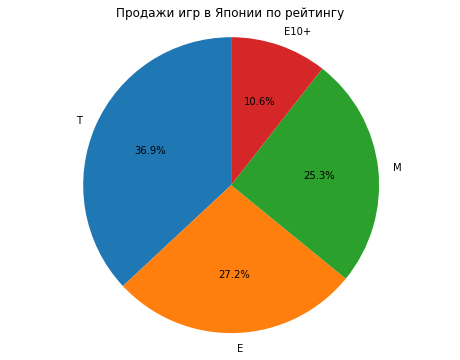

In [89]:
plt.figure(figsize=(8, 6))  
plt.pie(jp_rating_pivot_table['jp_sales'], labels=jp_rating_pivot_table.index, autopct='%1.1f%%', startangle=90)
plt.title('Продажи игр в Японии по рейтингу')  
plt.axis('equal')  

plt.show()

<div class="alert alert-block alert-info">

Влияние возрастного рейтинга на популярность игр в разных регионах

Возрастной рейтинг играет ключевую роль в популярности игр в разных регионах:

Северная Америка и Европа: игры с рейтингом 17+ пользуются наибольшим спросом, что свидетельствует о преимущественной ориентации этих рынков на взрослую аудиторию.
Япония: лидируют игры с рейтингом 13+, что указывает на стремление компаний расширить свое влияние на молодое поколение игроков.

# Общий вывод

Портрет типичного игрока в разных регионах мира

Анализируя данные по регионам, мы можем составить портрет типичного игрока:

Американский игрок: в возрасте от 17 лет, предпочитает платформы PS4 или Xbox One, любит игры с активным действием и шутеры.

Европейский игрок: в возрасте от 17 лет, любит платформу PS4, любит игры с активным действием и шутеры.

Японский игрок: в возрасте от 13 лет, предпочитает портативные платформы 3DS или PSV, любит ролевые игры и экшены.

In [90]:
XOne = actual_games.query('platform == "XOne"')['user_score'].dropna()
XOne

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [91]:
PC = actual_games.query('platform == "PC"')['user_score'].dropna()
PC

458      3.9
1095     7.9
1351     2.2
1437     6.0
1530     5.4
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 155, dtype: float64

<div class="alert alert-block alert-info">

Несмотря на то, что средние пользовательские рейтинги платформ Xbox One и PC выглядят схожими, их дисперсия (разброс данных) отличается.

Проверка гипотезы:

Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    
Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.
   
   

Метод проверки:

Для проверки гипотезы будет использован t-тест Стьюдента. Результат теста может быть следующим:

"Отвергаем нулевую гипотезу": это означает, что данные противоречат нулевой гипотезе, и вероятнее всего, средние рейтинги платформ Xbox One и PC действительно отличаются.
    
"Не отвергаем нулевую гипотезу": это означает, что данные не противоречат гипотезе о равенстве средних рейтингов, и мы не можем отвергнуть ее.

In [92]:
alpha = 0.05

results = st.ttest_ind(XOne, PC)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC действительно схожи.

In [93]:
action = actual_games.query('genre == "Action"')['user_score'].dropna()
action.describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [94]:
sports = actual_games.query('genre == "Sports"')['user_score'].dropna()
sports.describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

<div class="alert alert-block alert-info">

На первый взгляд, статистические данные показывают различие между жанрами Action и Sports. 

Однако, чтобы проверить это предположение, мы проводим статистический тест, который сравнивает средние пользовательские рейтинги этих жанров. 

Наша нулевая гипотеза предполагает, что средние рейтинги одинаковы для обоих жанров. 

В свою очередь, альтернативная гипотеза предполагает, что средние рейтинги отличаются. 

Для проверки гипотез мы используем t-тест Стьюдента. 

Результатом теста может быть отвержение нулевой гипотезы или невозможность ее отвергнуть. 

Если мы отвергаем нулевую гипотезу, это означает, что данные противоречат нашему предположению об одинаковых средних рейтингах, и мы можем сделать вывод о том, что данные различаются.

В случае, если мы не можем отвергнуть нулевую гипотезу, это говорит о том, что наше предположение об одинаковых средних рейтингах подтверждается имеющимися данными.

In [95]:
alpha = 0.05

results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Полученные данные из метода describe() подтвердились, средние рейтинги у двух исследуемых жанров разные.

<div class="alert alert-block alert-info">

Игровая платформа XOne активно борется за новых пользователей, стремясь не отстать от конкурентов – PS4 и самой популярной платформы PC. В 2016 году качество игр на XOne приблизилось к уровню компьютерных игр.

Различие в оценках между жанрами Action и Sports обусловлено историей развития. Экшены, появившиеся в 80-х, постоянно совершенствуются, опираясь на богатый опыт предшественников. 

С другой стороны, спортивные игры часто ограничены необходимостью реалистичного воспроизведения реальных спортивных событий. Иногда игроки сталкиваются с непонятными решениями в спортивных играх, что сказывается на их оценках.

# Итоговый вывод

<div class="alert alert-block alert-info">
    
Анализ данных о продажах компьютерных игр выявил следующие ключевые факторы:

Подготовка данных:

Были выявлены и исправлены ошибки в данных, а также заполнены пропуски.
Проведен анализ данных и сформированы актуальные выводы.
Созданы профили пользователей для ключевых регионов продаж.
Проверены гипотезы о факторах, влияющих на продажи игр.

Факторы, влияющие на продажи:

Разработчик: успех игр во многом зависит от опыта и репутации разработчика. Игроки предпочитают игры от компаний с богатой историей и лояльной аудиторией.
Платформа: Современные платформы (PS4, XOne, 3DS) предоставляют разработчикам больше возможностей для создания качественных игр. техническое развитие платформ влияет на жизненный цикл игр (5-12 лет).
Жанр: выбор жанра зависит от предпочтений игрока. Разработчики и издатели конкурируют за свою целевую аудиторию, предлагая игры различных жанров.

Рекомендации по повышению продаж для интернет-магазина игр:

Сконцентрироваться на современных платформах (PS4, XOne, 3DS).
Предлагать популярные жанры: экшены, шутеры, спортивные и ролевые игры.
Считывать возрастную аудиторию, основная часть которой – игроки старше 17 лет.
Продолжать предлагать игры для PC, так как эта платформа по-прежнему пользуется популярностью.